# METODOS NUMERICOS Y PROGRAMACION 4
## Tarea 3
### Problemas 15, 16 de la lista de problemas. (Lista123_EDParabolicas.docx)
##### Daniel Valencia - Computacion Cientifica - 2018-1
---

# Solucion numerica de EDPs
---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

#### Usando las variables: 
<ul>
    <li> c: Difusividad termica.</li>
    <li> L: Longitud de la barra.</li>
    <li> T: Tiempo final.</li>
    <li> h: Step-size que divide a la barra. </li>
    <li> k: Step-size que divide al tiempo.</li>
    <li> f: Condicion inicial U(x,0) = f(x).</li>
    <li> a: Condicion inicial de frontera en U(0,t).</li>
    <li> b: Condicion inicial de frontera en U(l,t).</li>
</ul>

In [2]:
def tridiag(a,b,c,N):
    A = np.zeros((N,N))
    
    np.fill_diagonal(A[:-1,1:],a)
    np.fill_diagonal(A,b)
    np.fill_diagonal(A[1:,:-1],c)
    
    return A

#### - Implementacion en Python: 

In [3]:
def EDP_CN_Matricial(c, L, T, h, k, f, a, b):
    
    r = c*k/h**2
    m = round(L/h) + 1
    n = round(T/k) + 1
    
    x = np.linspace(0, L, m)
    
    w = np.zeros((n,m))
    w[0] = f(x)
    w[:,0] = a(0) 
    w[:,-1] = b(L)
    
    A = tridiag(-r/2, 1+r, -r/2, m-2)
    B = tridiag(r/2, 1-r, r/2, m-2)

         
    A_inv = np.linalg.inv(A)


    for i in range(n-1):
        
        C = np.dot(B, w[i,1:-1])
        C[0]  += r/2*(w[i+1,0]  + w[i,0])
        C[-1] += r/2*(w[i+1,-1] + w[i,-1])

        w[i+1,1:-1] = np.dot(A_inv, C)
    
    return w, x

#### - Error absoluto: 

In [4]:
def ErrorAb(a,b):
    n = len(a)
    c = []
    for i in range(n):
        c.append(np.absolute(a[i] - b[i]))
    return c

### Problema 15: 
---

Resuelva el siguiente problema por Crank - Nicolson: 

$$\frac{\partial U}{\partial t} (x,t)  - 0.01\frac{\partial ^2 U}{\partial x^2} (x,t)  = 0 $$
Con las condiciones frontera: 
$$U(0,t) = U(l,t) = 0 \text{  ,  } 0 < t$$
Y las condiciones iniciales: 
$$U(x,0) = sin(3 \pi x) \text{  ,  } x \in [0,1]$$
El tiempo final $T=0.3$ , con $h=0.1$ y $k=0.1$

#### - Los datos del problema: 

In [5]:
Mat1, x1 = EDP_CN_Matricial(0.1, 1, 0.3, 0.1, 0.01, lambda x: np.sin(3*np.pi * x), lambda x: 0, lambda x:0)

In [7]:
d1 = {'x': x1, 'Aproximacion': Mat1[-1]}
df1 = pd.DataFrame(data=d1)
df1 = df1[['x','Aproximacion']]
df1

,x,Aproximacion
0,0.0,0.000000
1,0.1,0.068110
2,0.2,0.080069
3,0.3,0.026016
4,0.4,-0.049485
5,0.5,-0.084189
6,0.6,-0.049485
7,0.7,0.026016
8,0.8,0.080069
9,0.9,0.068110


### Problema 16
---
Muestre el comportamiento de la temperatura de la varilla del problema 8 en su punto medio a traves del tiempo, elija, segun su criterio, el numero de nodos en ambas variables.

#### El enunciado del problema 8 es: 

Resolver el siguiente problema: 

$$\frac{\partial U}{\partial t} (x,t)  = 0.9\frac{\partial ^2 U}{\partial x^2} (x,t) $$
Con las condiciones frontera: 
$$U(0,t) = U(l,t) = 0 \text{  ,  } t \in \langle 0, T]$$
Y las condiciones iniciales: 
$$U(x,0) = sen(\pi x) \text{  ,  } x \in [0,1]$$
El tiempo final $T=0.3$ , con $h=0.1$ y $k=0.1$. Usar el metodo explicito, es buena la aproximacion?

Considere la solucion analitica: $\displaystyle U(x,t) = e^{-0.9\pi ^2 t}sen(\pi x)$

#### Implementacion en Python, metodo explicito: 

In [19]:
def EDP_Exp_Matricial(c, L, T, h, k, f, a, b):
    
    r = c*k/h**2
    m = round(L/h) + 1
    n = round(T/k) + 1
    
    x = np.linspace(0, L, m)
    t = np.linspace(0, T, n)
    
    w = np.zeros((n,m))
    w[0] = f(x)
    w[:,0] = a(0) 
    w[:,-1] = b(L)
    
    W = tridiag(r, 1-2*r, r, m-2) 
    
    for i in range(n-1):
        w[i+1,1:-1] = np.dot(W, w[i,1:-1])
        w[i+1,1] += r*w[i,0]
        w[i+1,-2] += r*w[i,-1]
        
    return w,x,t

#### Solucion exacta: 

In [20]:
def Exacta(x,t):
    n = len(x)
    sol = []
    for i in range(n):
        sol.append((np.exp(-0.9*(np.pi**2)*(t)))*np.sin(np.pi*x[i]))
    return sol

#### Los datos para el ejemplo: 

In [21]:
Mat2, x2, t2 = EDP_Exp_Matricial(0.9, 1, 0.3, 0.1, 0.0005, lambda x: np.sin(np.pi * x), lambda x: 0, lambda x:0)

Exa2 = Exacta(x2,0.5)
Err2 = ErrorAb(Mat2[-1],Exa2)
d2 = {'x': x2, 'Aproximacion': Mat2[-1], 'Exacta': Exa2, 'Error': Err2}
df2 = pd.DataFrame(data=d2)
df2 = df2[['x','Aproximacion','Exacta','Error']]
df2

,x,Aproximacion,Exacta,Error
0,0.0,0.000000,0.000000e+00,0.000000e+00
1,0.1,0.021859,3.640330e-03,1.821861e-02
2,0.2,0.041578,6.924319e-03,3.465386e-02
3,0.3,0.057227,9.530507e-03,4.769694e-02
4,0.4,0.067275,1.120378e-02,5.607112e-02
5,0.5,0.070737,1.178035e-02,5.895666e-02
6,0.6,0.067275,1.120378e-02,5.607112e-02
7,0.7,0.057227,9.530507e-03,4.769694e-02
8,0.8,0.041578,6.924319e-03,3.465386e-02
9,0.9,0.021859,3.640330e-03,1.821861e-02


#### Dado el analisis del error se puede decir que es una buena aproximacion.

Text(0.5,0,'Variacion del tiempo hasta T')

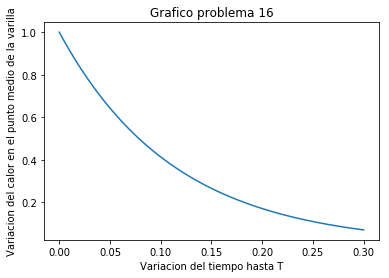

In [33]:
plt.plot(t2, Mat2[:,5])
plt.title("Grafico problema 16")
plt.ylabel("Variacion del calor en el punto medio de la varilla")
plt.xlabel("Variacion del tiempo hasta T")